## Comparing Metrics

> Head to head comparison of time series analysis vs fourier series analysis

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('compared_metrics.csv')
df_acc = df.iloc[:,:3]
df_fnr = pd.concat([df.iloc[:,0],df.iloc[:,3:]], axis=1)

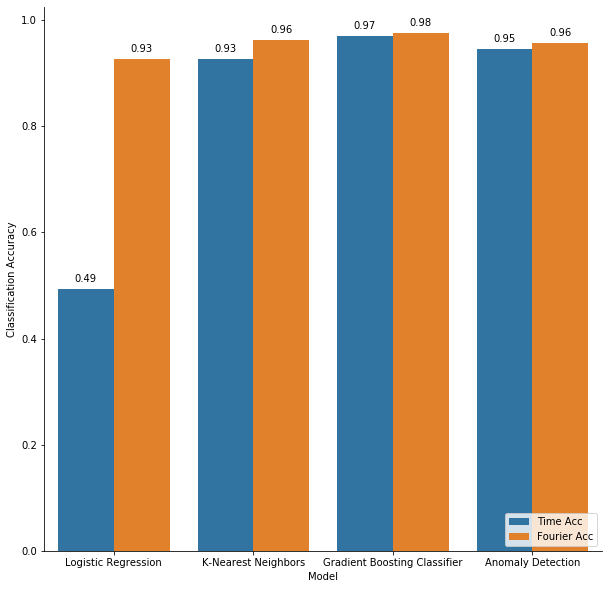

In [12]:
df_acc_melt = df_acc.melt(id_vars='Model').rename(columns=str.title)
fig, axes = plt.subplots(figsize=(10, 10))
g = sb.barplot(x='Model', y='Value', hue='Variable', data=df_acc_melt, ax=axes)
axes.set(ylabel="Classification Accuracy")
sb.despine(fig)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend(loc='lower right')


In [80]:
df_acc.head()

,Model,Time Acc,Fourier Acc
0,Linear Regression,0.4935,0.9265
1,K-Nearest Neighbors,0.9278,0.9748
2,Gradient Boosting Classifier,0.9696,0.9757
3,Anomaly Detection,0.9452,0.8817


- Classification Accuracy: Higher is better
    - Gradient boosting has the highest classification accuracy when using fourier series data.

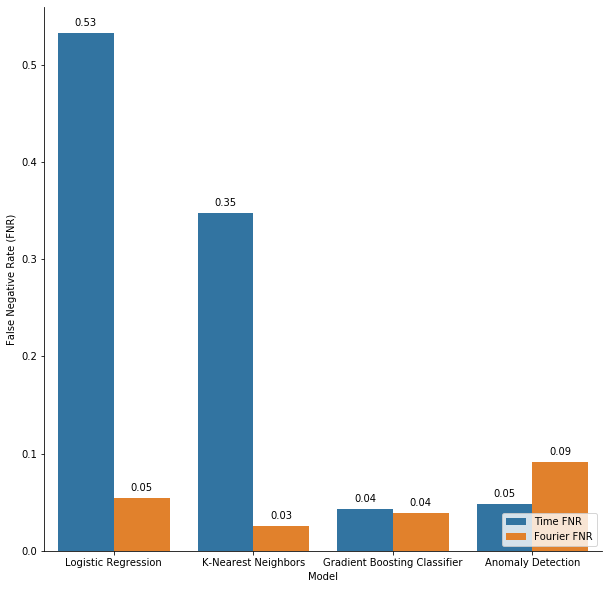

In [13]:
df_fnr_melt = df_fnr.melt(id_vars='Model').rename(columns=str.title)

fig, axes = plt.subplots(figsize=(10, 10))
g = sb.barplot(x='Model', y='Value', hue='Variable', data=df_fnr_melt, ax=axes)
axes.set(ylabel="False Negative Rate (FNR)")
sb.despine(fig)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend(loc='lower right')

In [81]:
df_fnr.head()

,Model,Time FNR,Fourier FNR
0,Linear Regression,0.5326,0.0545
1,K-Nearest Neighbors,0.3478,0.0261
2,Gradient Boosting Classifier,0.0435,0.0392
3,Anomaly Detection,0.0482,0.5817


- False Negative Rate: Lower is better
    - K-Nearest Neighbors has the lowest FNR when using fourier series data.